In [141]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [149]:
xd = 0.04
xg = 0.9
xv = 0.06
ba = 37.5
bv = 2
c = 1
n = 4

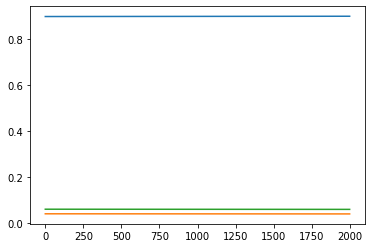

In [150]:
xgpoints = []
xdpoints = []
xvpoints = []
i = 0
while (i <= 20):
    ngbinomial = np.mean(np.random.binomial(n, xg, 1000))
    multinomial = np.random.multinomial(n, [xg,xv,xd], 1000)
    ngmultinomial = np.mean(multinomial[:,0])
    nv = np.mean(multinomial[:,1])

    wg = (ba*(ngbinomial+1))/(n+1)
    wv = (ba*ngbinomial)/(n+1) + (bv*(nv+1))/(n-ngmultinomial+1) - c
    wd = (ba*ngbinomial)/(n+1) + (bv*nv)/(n-ngmultinomial+1)

    w = xg*wg + xv*wv + xd*wd

    xgpoints.append(xg)
    xdpoints.append(xd)
    xvpoints.append(xv)
    xg = xg + xg * (wg - w) * 0.000001
    xv = xv + xv * (wv - w) * 0.000001
#   xd = xd + xd * (wd - w) * 0.000001
    xd = 1 - xg - xv
    i = i + 0.01

plt.plot(xgpoints)
plt.plot(xdpoints)
plt.plot(xvpoints)

In [ ]:
# ngbinomial = np.mean(np.random.binomial(n, xg, 1000))       #Ng ~ Bn(xg) 
# multinomial = np.random.multinomial(n, [xg,xv,xd], 1000)    #generate random multinomial 1000 times      
# ngmultinomial = np.mean(multinomial[:,0])                   #Ng ~ Mn(xg,xv) 
# nv = np.mean(multinomial[:,1])                              #Nv ~ Mn(xg,xv) 

# wg = (ba*(ngbinomial+1))/(n+1)
# wv = (ba*ngbinomial)/(n+1) + (bv*(nv+1))/(n-ngmultinomial+1) - c
# wd = (ba*ngbinomial)/(n+1) + (bv*nv)/(n-ngmultinomial+1)

# w = xg*wg + xv*wv + xd*wd

# xg_ot = xg * (wg - w) #xg_overtime
# xv_ot = xv * (wv - w)
# xd_ot = xd * (wd - w)

# xg = xg + xg * (wg - w) * 1
# xv = xv + xv * (wv - w) * 1
# xd = xd + xd * (wd - w) * 1
# print(xg_ot,xv_ot,xd_ot)
# print(xg,xv,xd)